<a href="https://colab.research.google.com/github/spuderaarom/Intro-to-ML/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1 (50 points)**

Develop a code that runs linear regression with a gradient decent algorithm for each explanatory variable in isolation. In this case, you assume that in each iteration, only one explanatory variable (either X1, X2, or X3) is explaining the output. You need to do three different training, one per each explanatory variable. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters to zero (theta to zero).

1. Report the linear model you found for each explanatory variable.
2. Plot the final regression model and loss over the iteration per each explanatory variable.
3. Which explanatory variable has the lower loss (cost) for explaining the output (Y)?
4.
Based on your training observations, describe the impact of the different learning rates on the final loss and number of training iterations.

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import os
from matplotlib import pyplot as plt
#drive.mount('/content/drive')
# print(os.listdir(os.getcwd()+'/drive/MyDrive'))

#df = pd.read_csv(r"C:\Users\aaron\OneDrive\Desktop\UNCC\23-24\Machine Learning\Assignment 1\D3.csv")
file_path = './drive/MyDrive/D3.csv'
df = pd.DataFrame(pd.read_csv(file_path))
df.head()

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


<Axes: xlabel='X1', ylabel='Y'>

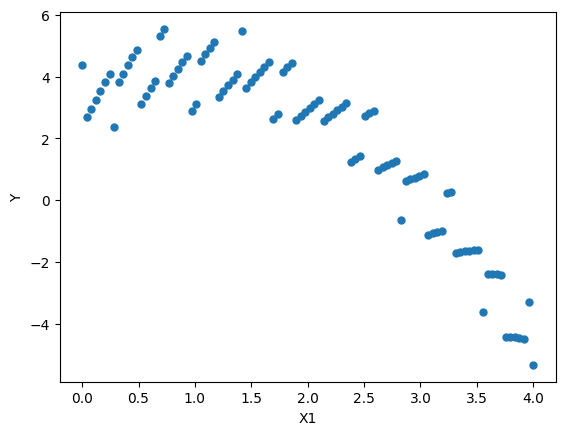

In [ ]:
# @title X1 vs Y
df.plot(kind='scatter', x='X1', y='Y', s=25, alpha=1)
# plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='X2', ylabel='Y'>

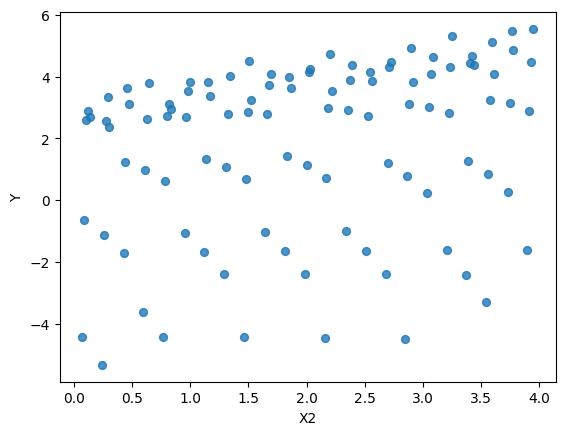

In [ ]:
# @title X2 vs Y
df.plot(kind='scatter', x='X2', y='Y', s=32, alpha=.8)

<Axes: xlabel='X3', ylabel='Y'>

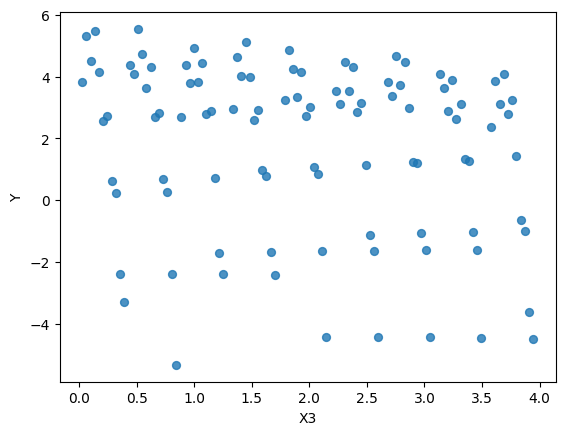

In [ ]:
# @title X3 vs Y
df.plot(kind='scatter', x='X3', y='Y', s=32, alpha=.8)

In [ ]:
X1 = df.values[:, 0]
X2 = df.values[:, 1]
X3 = df.values[:, 2]
Y = df.values[:, 3]
m = len(Y)
n1 = len(X1)
n2 = len(X2)
n3 = len(X3)

In [ ]:
X_0= np.ones((m,1))
X_1 = X1.reshape(m, 1)
X_2 = X2.reshape(m, 1)
X_3 = X3.reshape(m, 1)

In [ ]:
Xtotal1 = np.hstack((X_0, X_1))
Xtotal2 = np.hstack((X_0, X_2))
Xtotal3 = np.hstack((X_0, X_3))
theta = np.zeros(2)
theta

array([0., 0.])

In [ ]:
def compute_cost( X, Y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [ ]:
# Compute cost for theta values
cost1 = compute_cost(Xtotal1, Y, theta)
cost2 = compute_cost(Xtotal2, Y, theta)
cost3 = compute_cost(Xtotal3, Y, theta)

print('Cost 1 =', cost1)
print('Cost 2 =', cost2)
print('Cost 3 =', cost3)

Cost 1 = 5.524438459196242
Cost 2 = 5.524438459196242
Cost 3 = 5.524438459196242


In [ ]:
def gradient_descent(X, Y, theta, alpha, iterations):
    m = len(Y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, Y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, Y, theta)

    return theta, cost_history

**Problem 2 (50 points)**

This time, run linear regression with gradient descent algorithm using all three explanatory variables. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (theta to zero).

1. Report the final linear model you found the best.
2. Plot loss over the iteration.
3. Based on your training observations, describe the impact of the different learning rates on the final loss and number of training iterations.
4. Predict the value of y for new (X1, X2, X3) values (1, 1, 1), for (2, 0, 4), and for (3, 2, 1)

Final value of theta = [ 5.92043383 -2.03541173]
cost_history of X1= [5.48226715 5.44290965 5.40604087 ... 0.98500035 0.98500032 0.98500029]


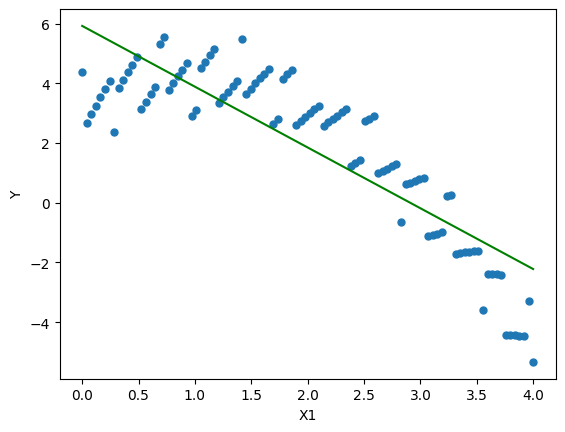

In [ ]:
# @title Linear Regression of X1 vs Y
iterations = 3000
alpha = 0.01

theta, cost_history = gradient_descent(Xtotal1, Y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history of X1=', cost_history)

df.plot(kind='scatter', x='X1', y='Y', s=25, alpha=1)
plt.plot(Xtotal1[:, 1], Xtotal1.dot(theta), color='green', label='Linear Regression')

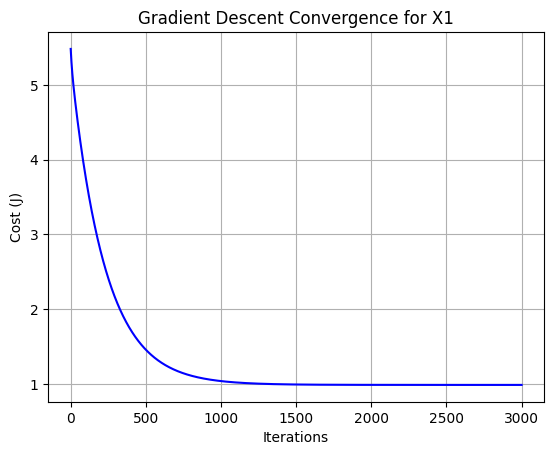

In [ ]:
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 10)
plt.grid(True)

plt.xlabel('Iterations')
plt.ylabel('Cost (J)')
plt.title('Gradient Descent Convergence for X1')
plt.show()

Theta = [0.74298726 0.55491162]
Cost History of X2= [8.05091167 7.9421806  7.84452525 ... 3.59937219 3.59937217 3.59937214]


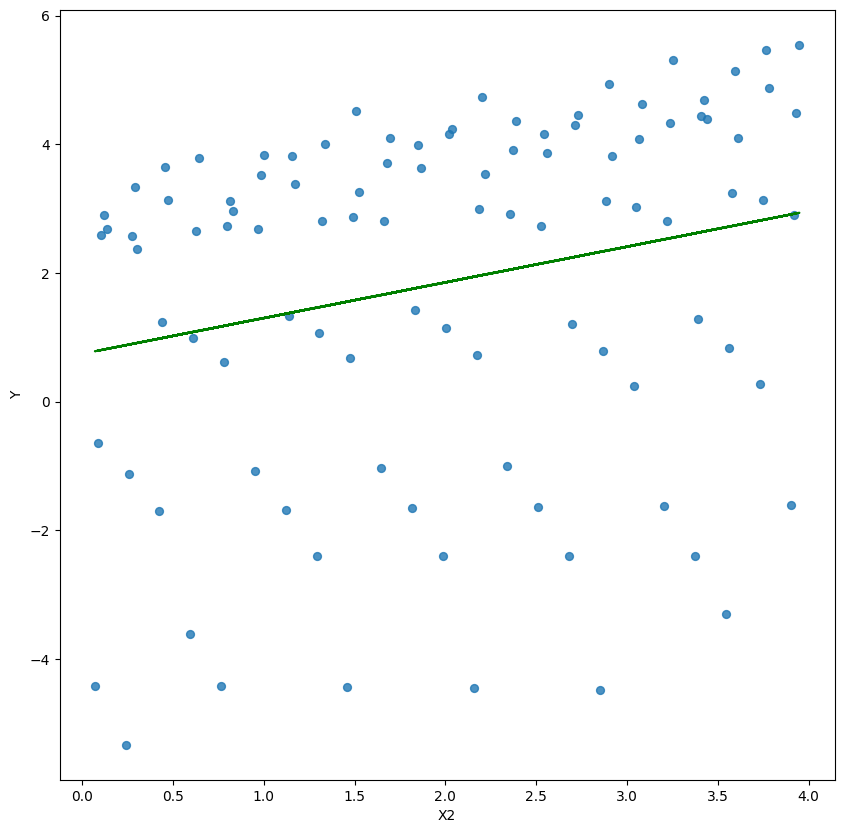

In [ ]:
iterations = 3000
alpha = 0.01

theta, cost_history = gradient_descent(Xtotal2, Y, theta, 0.01, 3000)
print('Theta =', theta)
print('Cost History of X2=', cost_history)

# @title Linear Regression of X2 vs Y
df.plot(kind='scatter', x='X2', y='Y', s=32, alpha=.8) #plots ppoints
plt.plot(Xtotal2[:, 1], Xtotal2.dot(theta), color='green', label='Linear Regression') #plots line

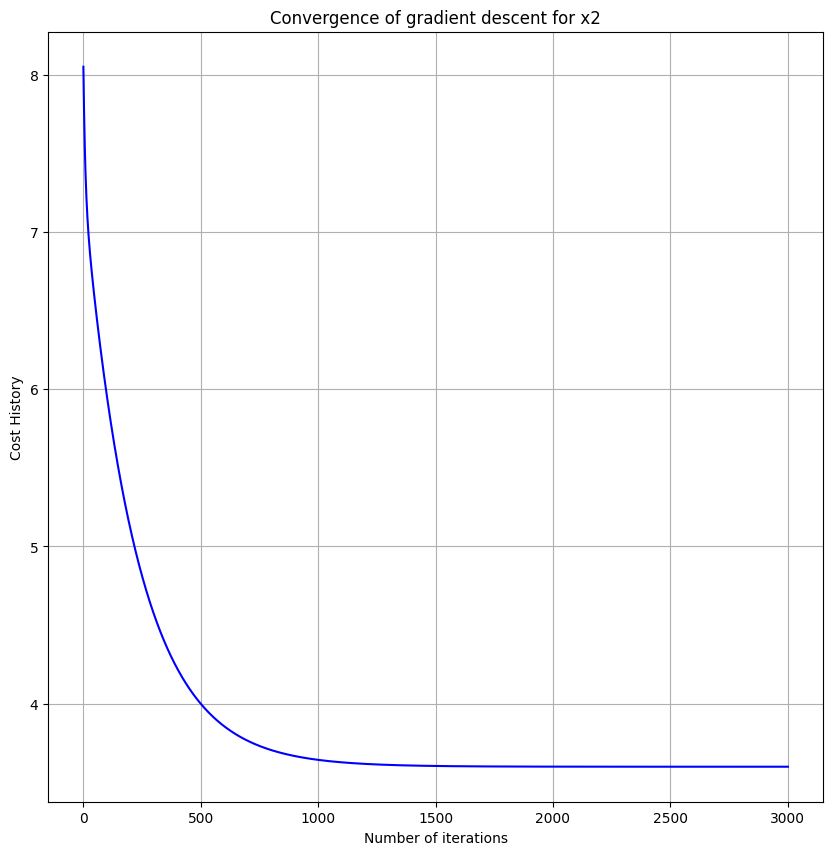

In [ ]:
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 10)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost History')
plt.title('Convergence of gradient descent for x2')

# Show the plot
plt.show()

Final value of theta = [ 2.86884294 -0.51946284]
cost_history of X3= [4.38486603 4.36766685 4.35214048 ... 3.629452   3.62945199 3.62945199]


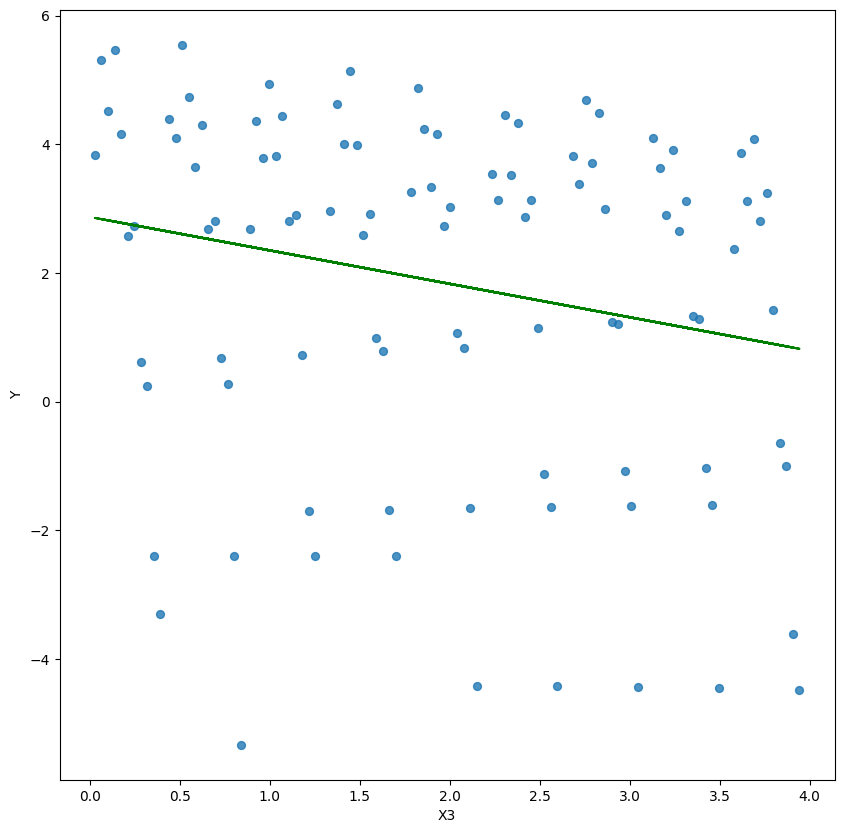

In [ ]:
iterations = 3000
alpha = 0.01

theta, cost_history = gradient_descent(Xtotal3, Y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history of X3=', cost_history)

# @title Linear Regression X3 vs Y
df.plot(kind='scatter', x='X3', y='Y', s=32, alpha=.8)
plt.plot(Xtotal3[:, 1], Xtotal3.dot(theta), color='green', label='Linear Regression')

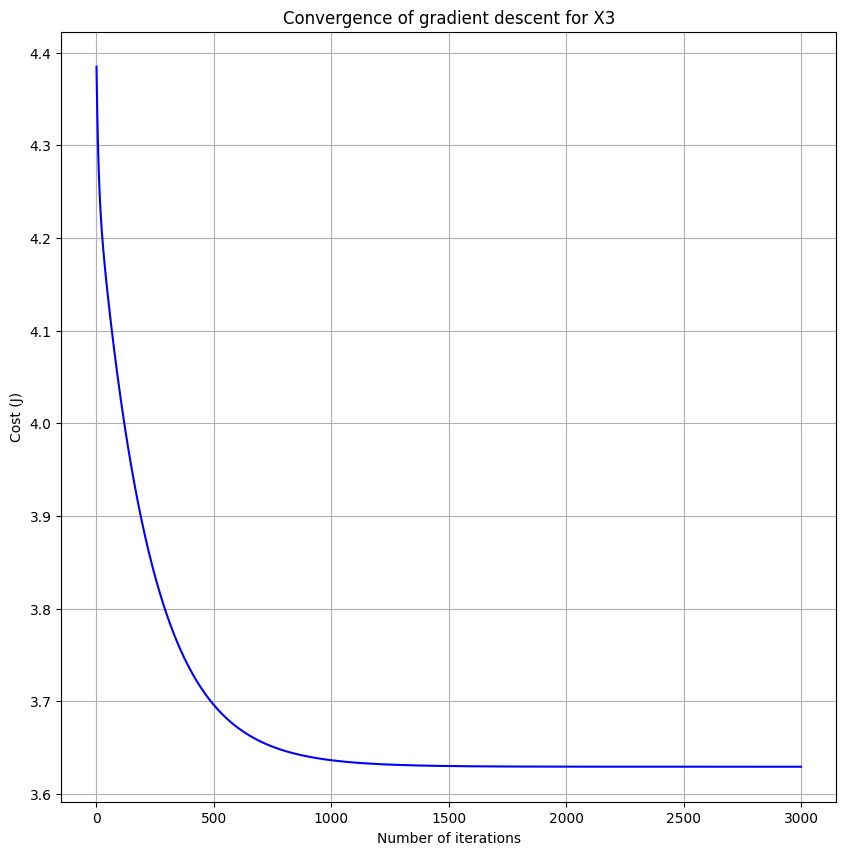

In [ ]:
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for X3')

# Show the plot
plt.show()

In [ ]:
XtotalOfAll = np.hstack((X_0, X_1,X_2,X_3))
XtotalOfAll[:5]
theta = np.zeros(4)
theta

array([0., 0., 0., 0.])

In [ ]:
def compute_cost( X, Y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [ ]:
iterations = 450
alpha = 0.01
costOfAll = compute_cost(XtotalOfAll, Y, theta)
print('The cost all inputs and outputs Y =', costOfAll)

The cost all inputs and outputs Y = 5.524438459196242


In [ ]:
def gradient_descent(X, Y, theta, alpha, iterations):
    m = len(Y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, Y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, Y, theta)

    return theta, cost_history

In [ ]:
theta, cost_history = gradient_descent(XtotalOfAll, Y, theta, alpha, iterations)
print('Final theta cost =', theta)
print('Cost History of X total=', cost_history)

Final theta cost = [ 2.0000117  -1.53039346  1.0782819   0.21685328]
Cost History of X total= [5.21542243 4.97171977 4.7765543  4.61755306 4.48558801 4.37392249
 4.27758231 4.19289222 4.11713446 4.04829701 3.98488821 3.92580007
 3.87020751 3.81749422 3.76719793 3.71897006 3.67254609 3.62772359
 3.58434612 3.54229132 3.50146212 3.46178029 3.42318165 3.38561257
 3.34902735 3.31338631 3.27865434 3.2447999  3.2117942  3.17961066
 3.14822444 3.11761213 3.08775154 3.05862146 3.0302016  3.00247242
 2.97541508 2.94901137 2.92324366 2.89809486 2.87354841 2.84958821
 2.82619863 2.80336448 2.781071   2.75930383 2.73804901 2.71729296
 2.69702247 2.67722469 2.65788713 2.63899761 2.62054429 2.60251568
 2.58490056 2.56768802 2.55086746 2.53442856 2.51836126 2.50265579
 2.48730265 2.47229256 2.45761652 2.44326576 2.42923175 2.41550619
 2.402081   2.38894831 2.37610046 2.36353002 2.35122973 2.33919253
 2.32741157 2.31588015 2.30459179 2.29354014 2.28271905 2.27212252
 2.26174472 2.25157997 2.24162274 2